In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## (Ordinary) Linear Models

In [6]:
import statsmodels.formula.api as smf

In [7]:
# Perform linear regression to see hoe the total_bill relates to--or predicts--the tip.
# ols: Ordinary Least Squares
# response ~ (as a function of) predictor
model = smf.ols('tip ~ total_bill', data=tips)

In [8]:
results = model.fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           6.69e-34
Time:                        07:32:14   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

In [10]:
# To just get the coefficients...
results.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

**Interpretation:** Recall that the formula for a line is $y = mx + b$, where $y$ is the response variable, $x$ is the predictor, $b$ is the intercept, and $m$ is the slope--the parameter we are estimating.  
Therefore, $y = (0.105)x + 0.920$. For every one unit increase in `total_bill`, the tip increases by 0.105 (10.5 cents).
***********************************

### Multiple Regression

In [11]:
model = smf.ols(formula = 'tip ~ total_bill + size', data=tips).fit()

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           9.67e-34
Time:                        07:32:14   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

#### Categorical variables
When we want to model categorical variables we have to create *dummy* variables. That is, each unique value in a category becomes a new *binary feature*.  
`statsmodels` will automatically create the dummy variables. To avoid multicolinearity, we typically drop one of the dummy variables. If we have one column denoting Female, we deduce that if the value is false, that indicates Male.

In [13]:
model = smf.ols(formula='tip ~ total_bill + size + sex + smoker + day + time',
               data=tips).fit()

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           1.20e-28
Time:                        07:32:14   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.

**Example Interpretation**: When sex changes from male to female, the tip increases by .324

****************************
## Generalized Linear Models

GLMs account for non-linear data, such as binary or count data, but still uses a linear combination of predictors.  
### Logistic Regression

In [15]:
acs = pd.read_csv('../data/acs_ny.csv')
print(acs.columns)
acs.sample(5)

Index(['Acres', 'FamilyIncome', 'FamilyType', 'NumBedrooms', 'NumChildren',
       'NumPeople', 'NumRooms', 'NumUnits', 'NumVehicles', 'NumWorkers',
       'OwnRent', 'YearBuilt', 'HouseCosts', 'ElectricBill', 'FoodStamp',
       'HeatingFuel', 'Insurance', 'Language'],
      dtype='object')


,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language
12044,Sub 1,79500,Married,4,3,5,7,Single detached,2,2,Mortgage,1970-1979,1100,130,No,Gas,500,English
4126,1-10,193000,Married,4,0,4,8,Single detached,4,3,Mortgage,2000-2004,2800,210,No,Oil,1000,English
5844,Sub 1,24000,Married,3,0,2,6,Single detached,1,1,Mortgage,Before 1939,1800,80,No,Gas,300,English
17145,Sub 1,132000,Married,4,0,3,8,Single detached,2,3,Mortgage,1970-1979,2900,440,No,Oil,1200,English
13922,Sub 1,96000,Married,3,2,6,6,Single detached,0,3,Mortgage,1990-1999,2300,100,No,Gas,1000,Other European


In [16]:
# Create a binary response variable by splitting FamilyIncome into a binary variable.
acs['ge150k'] = pd.cut(acs['FamilyIncome'],
                      [0, 150000, acs['FamilyIncome'].max()],
                      labels = [0, 1])
acs['ge150k_i'] = acs['ge150k'].astype(int)
acs['ge150k_i'].value_counts()

0    18294
1     4451
Name: ge150k_i, dtype: int64

In [17]:
# Using the statsmodels 'logit' (logistic regresion) function...
model = smf.logit('ge150k_i ~ HouseCosts + NumWorkers + '\
                 'OwnRent + NumBedrooms + FamilyType',
                 data = acs)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.391651
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               ge150k_i   No. Observations:                22745
Model:                          Logit   Df Residuals:                    22737
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Jan 2020   Pseudo R-squ.:                  0.2078
Time:                        07:32:15   Log-Likelihood:                -8908.1
converged:                       True   LL-Null:                       -11244.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.8081      0.120    -48.456      0.000      -6.043   

**To interpret a logistic model we first need to *exponentiate* the results...**

In [18]:
import numpy as np
odds_ratios = np.exp(results.params)
odds_ratios

Intercept                  0.003003
OwnRent[T.Outright]        6.219147
OwnRent[T.Rented]          0.416310
FamilyType[T.Male Head]    1.332901
FamilyType[T.Married]      4.005636
HouseCosts                 1.000731
NumWorkers                 1.799117
NumBedrooms                1.266852
dtype: float64

**Example interpretation**: For every one unit increase in `NumBedrooms` the odds of the `FamilyIncome` being greater than $150k increases by 1.27 times. 

**************************
## Poisson Regression

Used when the response variable involves count data, such as `NumChildren`.

In [19]:
results = smf.poisson('NumChildren ~ FamilyIncome + FamilyType + OwnRent',
                     data=acs).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: nan
         Iterations 1
                          Poisson Regression Results                          
Dep. Variable:            NumChildren   No. Observations:                22745
Model:                        Poisson   Df Residuals:                    22739
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 Jan 2020   Pseudo R-squ.:                     nan
Time:                        07:32:15   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -30977.
Covariance Type:            nonrobust   LLR p-value:                       nan
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                      nan        nan        nan        nan         nan        

c:\users\ugdk93\env\lib\site-packages\statsmodels\discrete\discrete_model.py:1259: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + exposure + offset)
c:\users\ugdk93\env\lib\site-packages\statsmodels\discrete\discrete_model.py:1260: RuntimeWarning: overflow encountered in multiply
  return -np.dot(L*X.T, X)
c:\users\ugdk93\env\lib\site-packages\statsmodels\discrete\discrete_model.py:1260: RuntimeWarning: invalid value encountered in multiply
  return -np.dot(L*X.T, X)
c:\users\ugdk93\env\lib\site-packages\statsmodels\discrete\discrete_model.py:1168: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
c:\users\ugdk93\env\lib\site-packages\scipy\stats\_discrete_distns.py:598: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0
c:\users\ugdk93\env\lib\site-packages\statsmodels\base\optimizer.py:299: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
c:\users\ugdk93\env\li

In [20]:
# Alternatively, this can be done using the glm function and Poisson family.
import statsmodels
import statsmodels.api as sm

model = smf.glm('NumChildren ~ FamilyIncome + FamilyType + OwnRent',
               data=acs,
               family=sm.families.Poisson(sm.genmod.families.links.log))
results = model.fit()
print(results.summary())

c:\users\ugdk93\env\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  import sys


                 Generalized Linear Model Regression Results                  
Dep. Variable:            NumChildren   No. Observations:                22745
Model:                            GLM   Df Residuals:                    22739
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30679.
Date:                Thu, 09 Jan 2020   Deviance:                       34643.
Time:                        07:32:17   Pearson chi2:                 3.34e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#### Negative Binomial Regression for Overdispersion
If our assumptions for Poisson regression are violated--if our data has overdispersion--we can perform a negative binomial regression instead.

In [21]:
model = smf.glm('NumChildren ~ FamilyIncome + FamilyType + OwnRent',
               data=acs,
               family=sm.families.NegativeBinomial(sm.genmod.families.links.log))
results = model.fit()
print(results.summary())

c:\users\ugdk93\env\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


                 Generalized Linear Model Regression Results                  
Dep. Variable:            NumChildren   No. Observations:                22745
Model:                            GLM   Df Residuals:                    22739
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29749.
Date:                Thu, 09 Jan 2020   Deviance:                       20731.
Time:                        07:32:17   Pearson chi2:                 1.77e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

**See the statsmodels GLM documentation for the various families that can be passed to the `glm` parameter:** www.statsmodels.org/dev/glm.html
******************************
## Survival Analysis
Used then modeling the time to occurrance of a certain event and is performed using the `lifelines` library (https://lifelines.readthedocs.io/en/latest/

In [22]:
bladder = pd.read_csv('../data/bladder.csv')
print(bladder.shape)
bladder.sample(5)

(340, 7)


,id,rx,number,size,stop,event,enum
95,24,1,1,5,30,0,4
328,83,2,3,4,54,0,1
241,61,2,1,3,25,0,2
305,77,2,1,2,45,0,2
161,41,1,3,1,51,0,2


In [23]:
# The counts of the different treatments
bladder['rx'].value_counts()

1    188
2    152
Name: rx, dtype: int64

In [24]:
from lifelines import KaplanMeierFitter

In [25]:
kmf = KaplanMeierFitter()
kmf.fit(bladder['stop'], event_observed=bladder['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 340 total observations, 228 right-censored observations>

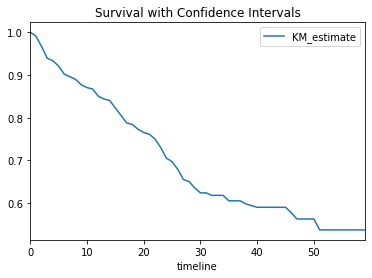

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = kmf.survival_function_.plot(ax=ax)
ax.set_title('Survival with Confidence Intervals')
plt.show()

Now fit a model to predict survival rate. One such model is the `Cox proportional hazards` model.

In [27]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

# Pass in the variables to be used as predictors.
cph_bladder_df = bladder[['rx', 'number', 'size', 'enum', 'stop', 'event']]
cph.fit(cph_bladder_df, duration_col='stop', event_col='event')

<lifelines.CoxPHFitter: fitted with 340 total observations, 228 right-censored observations>

In [28]:
print(cph.print_summary())

None


#### Testing the Cox Model Assumptions
Plot a separate survival curve by strata (in this example, the values of the `rx` columns, meaning we will plot a curve for each type of treatment. If the log(-log(survival curve) vs. the log(time) curves cross each other, then it signals the model needs to be stratified by the variable.

c:\users\ugdk93\env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


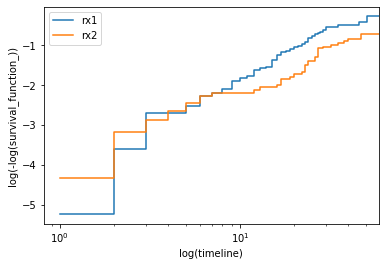

In [29]:
rx1 = bladder.loc[bladder['rx'] == 1]
rx2 = bladder.loc[bladder['rx'] == 2]

kmf1 = KaplanMeierFitter()
kmf1.fit(rx1['stop'], event_observed=rx1['event'])

kmf2 = KaplanMeierFitter()
kmf2.fit(rx2['stop'], event_observed=rx2['event'])

fig, axes = plt.subplots()

# put both plots on the same axes
kmf1.plot_loglogs(ax=axes)
kmf2.plot_loglogs(ax=axes)

axes.legend(['rx1', 'rx2'])

plt.show()

Since the lines cross, it makes sense to stratify our analysis.

In [30]:
cph_strat = CoxPHFitter()
cph_strat.fit(cph_bladder_df, duration_col='stop', event_col='event',
             strata=['rx'])
print(cph_strat.print_summary())

None


********************************************
## Model Diagnostics

### Residuals
The residuals of a model compare what the model calculates and the actual values in the data.

In [31]:
housing = pd.read_csv('../data/housing_renamed.csv')
housing.sample(5)

,neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
750,UPPER WEST SIDE (59-79),R4-CONDOMINIUM,222,1988.0,269253,11120149,41.30,3642993,13.53,7477156,56460998,209.69,Manhattan
511,CHELSEA,R4-CONDOMINIUM,64,2005.0,118000,4960000,42.03,1360000,11.53,3600000,25460999,215.77,Manhattan
2210,ELMHURST,R2-CONDOMINIUM,24,1988.0,19769,366320,18.53,168037,8.50,198283,1176974,59.54,Queens
1860,WILLIAMSBURG-EAST,R4-CONDOMINIUM,12,2006.0,16627,323894,19.48,132797,7.99,191097,1370000,82.40,Brooklyn
1478,SUNSET PARK,R4-CONDOMINIUM,15,2008.0,24043,433736,18.04,154596,6.43,279140,2044001,85.01,Brooklyn


In [32]:
# Let's begin with a multiple linear regression model with three covariates.
house1 = smf.glm('value_per_sq_ft ~ units + sq_ft + boro',
                data=housing).fit()
print(house1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        value_per_sq_ft   No. Observations:                 2626
Model:                            GLM   Df Residuals:                     2619
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1879.5
Method:                          IRLS   Log-Likelihood:                -13621.
Date:                Thu, 09 Jan 2020   Deviance:                   4.9224e+06
Time:                        07:32:20   Pearson chi2:                 4.92e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.29

Plotting the model residuals, we are looking for a random scattering of points. If a pattern is apparent then we will need to investigate our data and model as to why the pattern emerged.

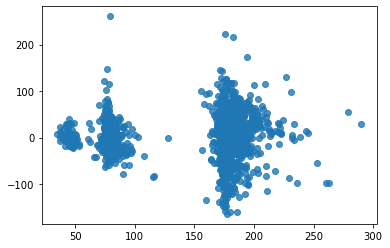

In [33]:
fig, ax = plt.subplots()
ax = sns.regplot(x=house1.fittedvalues,
                y=house1.resid_deviance, fit_reg=False)
plt.show()

In [34]:
fig.savefig('../images/resid_1')

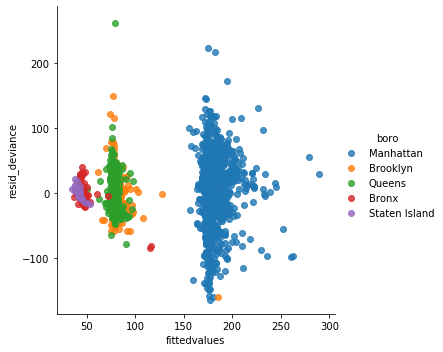

In [35]:
# Plot shows clustering, which is concerning. Color plot by boro.
res_df = pd.DataFrame({
    'fittedvalues': house1.fittedvalues,
    'resid_deviance': house1.resid_deviance,
    'boro': housing['boro']
})

fig = sns.lmplot(x='fittedvalues', y='resid_deviance',
                data=res_df, hue='boro', fit_reg=False)
plt.show()
fig.savefig('../images/resid_boros')

#### Q-Q Plots
a q-q plote is a graphical technique that determines whether your data conforms to a reference distribution. This is one way to verify if your data is normal.

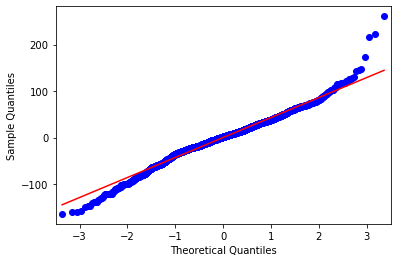

In [36]:
from scipy import stats

resid = house1.resid_deviance.copy()
resid_std = stats.zscore(resid)

fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
plt.show()

fig.savefig('../images/house_1_qq')

If the points lie on the red line, our data match our reference distribution. If they don't, we can apply a *transformation*. Some examples are, square, square root, log, reciprocal square root, and reciprocal square.

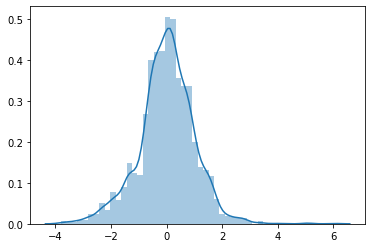

In [37]:
# We can also plot a historgram to verify normality.
fix, ax = plt.subplots()
ax = sns.distplot(resid_std)
plt.show()

fig.savefig('../images/house1_resid_std')

**********************************
### Comparing Multiple Models

In [38]:
# The * operator indicates interaction; that is, the variables that are interacting
# are behaving in such a way that is not dependent from one another, but rather in
# such a way that their values affect one another and are not simply additive.
f1 = 'value_per_sq_ft ~ units + sq_ft + boro'
f2 = 'value_per_sq_ft ~ units * sq_ft + boro'
f3 = 'value_per_sq_ft ~ units + sq_ft * boro + type'
f4 = 'value_per_sq_ft ~ units + sq_ft * boro + sq_ft * type'
f5 = 'value_per_sq_ft ~ boro + type'

house1 = smf.ols(f1, data=housing).fit()
house2 = smf.ols(f2, data=housing).fit()
house3 = smf.ols(f3, data=housing).fit()
house4 = smf.ols(f4, data=housing).fit()
house5 = smf.ols(f5, data=housing).fit()

In [39]:
mod_results = pd.concat([house1.params, house2.params, house3.params, 
                       house4.params, house5.params], axis=1).\
    rename(columns=lambda x: 'house' + str(x + 1)).\
    reset_index().\
    rename(columns={'index': 'param'}).\
    melt(id_vars='param', var_name='model', value_name='estimate')

c:\users\ugdk93\env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [40]:
mod_results.sample(10)

,param,model,estimate
69,type[T.RR-CONDOMINIUM],house4,-2.958482e+01
40,boro[T.Staten Island],house3,-1.564096e+01
45,sq_ft:boro[T.Staten Island],house3,-1.739492e-05
35,units:sq_ft,house2,-2.255855e-08
74,boro[T.Manhattan],house5,1.268014e+02
2,boro[T.Manhattan],house1,1.309924e+02
18,Intercept,house2,4.445184e+01
34,units,house2,-1.478411e-01
51,type[T.RR-CONDOMINIUM],house3,-1.450711e+01
63,sq_ft:boro[T.Staten Island],house4,-1.627792e-05


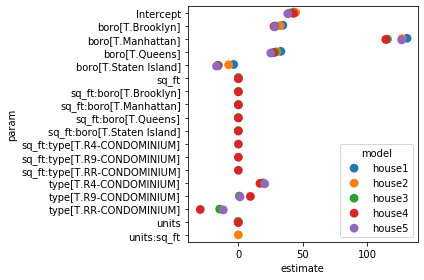

In [41]:
# Plot the coefficients to see how the models are estimating parameters
# in relation to each other.
fig, ax = plt.subplots()
ax = sns.pointplot(x='estimate', y='param', hue='model',
                  data=mod_results,
                  dodge=True, # jitter the points
                  join=False)  # don't connect the points
plt.tight_layout()
plt.show()

Now that we have our linear models, we can use the **analysis of variance (ANOVA)** method to compare them. ANOVA gives us the **residual sum of squares (RSS)**, which is one way to measure performance (lower is better).

In [42]:
model_names = ['house1', 'house2', 'house3', 'house4', 'house5']
house_anova = statsmodels.stats.anova.anova_lm(
    house1, house2, house3, house4, house5)
house_anova.index = model_names
print(house_anova)

        df_resid           ssr  df_diff        ss_diff          F  \
house1    2619.0  4.922389e+06      0.0            NaN        NaN   
house2    2618.0  4.884872e+06      1.0   37517.437605  20.039049   
house3    2612.0  4.619926e+06      6.0  264945.539994  23.585728   
house4    2609.0  4.576671e+06      3.0   43255.441192   7.701289   
house5    2618.0  4.901463e+06     -9.0 -324791.847907  19.275539   

              Pr(>F)  
house1           NaN  
house2  7.912333e-06  
house3  2.754431e-27  
house4  4.025581e-05  
house5           NaN  


Another way we can calculate model performance is by using the **Akaike Information Criterion (AIC)** and the **Bayesian Information Criterion (BIC)**. These methods apply a penalty for each feature that is added to the model. Thus, we should strive to balance performance and parsimony (lower is better).

In [43]:
house_models = [house1, house2, house3, house4, house5]
house_aic = list(map(statsmodels.regression.linear_model.RegressionResults.aic, house_models))
house_bic = list(map(statsmodels.regression.linear_model.RegressionResults.bic, house_models))

# Dicts are unordered
abic = pd.DataFrame({
    'model': model_names,
    'aic': house_aic,
    'bic': house_bic
})

In [44]:
print(abic)

    model           aic           bic
0  house1  27256.031113  27297.143632
1  house2  27237.939618  27284.925354
2  house3  27103.502577  27185.727615
3  house4  27084.800043  27184.644733
4  house5  27246.843392  27293.829128


#### Working with GLM Models
We can perform the same calculations and model diagnostics on GLMs. However, the ANOVA is simpy the deviance of the model.

In [45]:
def anova_deviance_table(*models):
    return pd.DataFrame({
        'df_residuals': [i.df_resid for i in models],
        'resid_stddev': [i.deviance for i in models],
        'df': [i.df_model for i in models],
        'deviance': [i.deviance for i in models]
    })

glm1 = smf.glm(f1, data=housing).fit()
glm2 = smf.glm(f2, data=housing).fit()
glm3 = smf.glm(f3, data=housing).fit()
glm4 = smf.glm(f4, data=housing).fit()
glm5 = smf.glm(f5, data=housing).fit()

glm_anova = anova_deviance_table(glm1, glm2, glm3, glm4, glm5)
print(glm_anova)

   df_residuals  resid_stddev  df      deviance
0          2619  4.922389e+06   6  4.922389e+06
1          2618  4.884872e+06   7  4.884872e+06
2          2612  4.619926e+06  13  4.619926e+06
3          2609  4.576671e+06  16  4.576671e+06
4          2618  4.901463e+06   7  4.901463e+06


In [46]:
# We can do the same set of calculations in a logistic regression.

# Create a new binary variable
housing['high_value'] = (housing['value_per_sq_ft'] >= 150).astype(int)
print(housing['high_value'].value_counts())

0    1619
1    1007
Name: high_value, dtype: int64


In [47]:
# Create and fit a logistic regression using GLM
f1 = 'high_value ~ units + sq_ft + boro'
f2 = 'high_value ~ units * sq_ft + boro'
f3 = 'high_value ~ units + sq_ft * boro + type'
f4 = 'high_value ~ units + sq_ft * boro + sq_ft * type'
f5 = 'high_value ~ boro + type'

logistic = statsmodels.genmod.families.family.Binomial(
    link=statsmodels.genmod.families.links.logit)

glm1 = smf.glm(f1, data=housing, family=logistic).fit()
glm2 = smf.glm(f2, data=housing, family=logistic).fit()
glm3 = smf.glm(f3, data=housing, family=logistic).fit()
glm4 = smf.glm(f4, data=housing, family=logistic).fit()
glm5 = smf.glm(f5, data=housing, family=logistic).fit()

# Show the deviances from the GLM models
print(anova_deviance_table(glm1, glm2, glm3, glm4, glm5))

c:\users\ugdk93\env\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  if __name__ == '__main__':


   df_residuals  resid_stddev  df     deviance
0          2619   1695.631547   6  1695.631547
1          2618   1686.126740   7  1686.126740
2          2612   1636.492830  13  1636.492830
3          2609   1619.431515  16  1619.431515
4          2618   1666.615696   7  1666.615696


In [48]:
# Finally, create a table of AIC and BIC values.
mods = [glm1, glm2, glm3, glm4, glm5]

mods_aic = list(map(statsmodels.regression.linear_model.RegressionResults.aic, mods))
mods_bic = list(map(statsmodels.regression.linear_model.RegressionResults.bic, mods))

# Dicts are unordered
abic = pd.DataFrame({
    'model': model_names,
    'aic': mods_aic,
    'bic': mods_bic
})
print(abic)

    model          aic          bic
0  house1  1709.631547  1750.744066
1  house2  1702.126740  1749.112476
2  house3  1664.492830  1746.717869
3  house4  1653.431515  1753.276205
4  house5  1682.615696  1729.601432


*********************************************************
### *k*-Fold Cross-Validation

Cross-validation, another method to compare models, can account for how well a model performs on new data. It holds one of the *k* parts aside as the "test" set and then fits the model on the remaining *k - 1* parts--the "training" set. The fitted model is then used on the "test" set and an error rate si calculated. The process is repeated until all **k** parts have been used as a "test" set. The final error of the model is some average across all the models.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print(housing.columns)

Index(['neighborhood', 'type', 'units', 'year_built', 'sq_ft', 'income',
       'income_per_sq_ft', 'expense', 'expense_per_sq_ft', 'net_income',
       'value', 'value_per_sq_ft', 'boro', 'high_value'],
      dtype='object')


In [50]:
# get training and test data
X_train, X_test, y_train, y_test = train_test_split(
    pd.get_dummies(housing[['units', 'sq_ft', 'boro']], drop_first=True),
    housing['value_per_sq_ft'],
    test_size=0.20,
    random_state=42
)

In [51]:
# Get a score indicating how well our model is performing using the test data.
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.613712528503087


In [52]:
# Perform a k-fold cross-validation
from sklearn.model_selection import KFold, cross_val_score
from patsy import dmatrices

# get a fresh new housing data set
housing = pd.read_csv('../data/housing_renamed.csv')
kf = KFold(n_splits=5) # as a very general rule, pick a k between 5 and 10.
y, X = dmatrices('value_per_sq_ft ~ units + sq_ft + boro', housing)

# Train the model on each fold.
coefs = []
scores = []
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    lr = LinearRegression().fit(X_train, y_train)
    coefs.append(pd.DataFrame(lr.coef_))
    scores.append(lr.score(X_test, y_test))
    
# View results
coefs_df = pd.concat(coefs)
coefs_df.columns = X.design_info.column_names
coefs_df

,Intercept,boro[T.Brooklyn],boro[T.Manhattan],boro[T.Queens],boro[T.Staten Island],units,sq_ft
0,0.0,33.369037,129.904011,32.103100,-4.381085,-0.205890,0.000220
0,0.0,32.889925,116.957385,31.295956,-4.919232,-0.146180,0.000155
0,0.0,30.975560,141.859327,32.043449,-4.379916,-0.179671,0.000194
0,0.0,41.449196,130.779013,33.050968,-3.430209,-0.207904,0.000232
0,0.0,-38.511915,56.069855,-17.557939,0.000000,-0.145829,0.000202


In [53]:
# Compute average coefficient across all folds.
print(coefs_df.apply(np.mean))

Intercept                  0.000000
boro[T.Brooklyn]          20.034361
boro[T.Manhattan]        115.113918
boro[T.Queens]            22.187107
boro[T.Staten Island]     -3.422088
units                     -0.177095
sq_ft                      0.000201
dtype: float64


In [54]:
# Scores for the LinearRegression method are R squared (coefficient of determination).
print(scores)

[0.027314162909386153, -0.5538362212297483, -0.1563637168803247, -0.323420206185989, -1.692965558624492]


In [55]:
# Alternatively, use cross_val_scores to calculate scores.
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[ 0.02731416 -0.55383622 -0.15636372 -0.32342021 -1.69296556]


In [56]:
# Refit all models using k-fold cross-validation

# Create the predictor and response matrices
y1, X1 = dmatrices('value_per_sq_ft ~ units + sq_ft + boro', housing)
y2, X2 = dmatrices('value_per_sq_ft ~ units * sq_ft + boro', housing)
y3, X3 = dmatrices('value_per_sq_ft ~ units + sq_ft * boro + type', housing)
y4, X4 = dmatrices('value_per_sq_ft ~ units + sq_ft * boro + sq_ft * type', housing)
y5, X5 = dmatrices('value_per_sq_ft ~ boro + type', housing)

# Fit linear models
model = LinearRegression()

scores1 = cross_val_score(model, X1, y1, cv=5)
scores2 = cross_val_score(model, X2, y2, cv=5)
scores3 = cross_val_score(model, X3, y3, cv=5)
scores4 = cross_val_score(model, X4, y4, cv=5)
scores5 = cross_val_score(model, X5, y5, cv=5)

scores_df = pd.DataFrame([scores1, scores3, scores3, scores4, scores5])
print(scores_df.apply(np.mean, axis=1))

0   -5.398543e-01
1   -4.806966e+25
2   -4.806966e+25
3   -1.532839e+25
4   -3.119081e+24
dtype: float64


**Note that throughout all the comparisons, model 4 has consistently had the lowest scores, and therefore has the best performance.**

*********************************************************
## Regularization

**Goal: Improve performance by preventing overfitting.**

In [57]:
# Start with a base case of linear regression using the ACS data.
acs = pd.read_csv('../data/acs_ny.csv')
print(acs.columns)

Index(['Acres', 'FamilyIncome', 'FamilyType', 'NumBedrooms', 'NumChildren',
       'NumPeople', 'NumRooms', 'NumUnits', 'NumVehicles', 'NumWorkers',
       'OwnRent', 'YearBuilt', 'HouseCosts', 'ElectricBill', 'FoodStamp',
       'HeatingFuel', 'Insurance', 'Language'],
      dtype='object')


In [58]:
response, predictors = dmatrices('FamilyIncome ~ NumBedrooms + NumChildren + NumPeople + ' \
                                'NumRooms + NumUnits + NumVehicles + NumWorkers + OwnRent + ' \
                                'YearBuilt + ElectricBill + FoodStamp + HeatingFuel + ' \
                                'Insurance + Language', data=acs)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, random_state=0)
lr = LinearRegression(normalize=True).fit(X_train, y_train)
model_coefs = pd.DataFrame(list(zip(predictors.design_info.column_names, lr.coef_[0])),
                          columns=['variable', 'coef_lr'])
print(model_coefs)

                       variable       coef_lr
0                     Intercept  3.522660e-11
1   NumUnits[T.Single attached]  3.135646e+04
2   NumUnits[T.Single detached]  2.418368e+04
3           OwnRent[T.Outright]  2.839186e+04
4             OwnRent[T.Rented]  7.229586e+03
5        YearBuilt[T.1940-1949]  1.292169e+04
6        YearBuilt[T.1950-1959]  2.057793e+04
7        YearBuilt[T.1960-1969]  1.764835e+04
8        YearBuilt[T.1970-1979]  1.756881e+04
9        YearBuilt[T.1980-1989]  2.552566e+04
10       YearBuilt[T.1990-1999]  2.983944e+04
11       YearBuilt[T.2000-2004]  3.012502e+04
12            YearBuilt[T.2005]  4.318648e+04
13            YearBuilt[T.2006]  3.242038e+04
14            YearBuilt[T.2007]  3.562061e+04
15            YearBuilt[T.2008]  3.712470e+04
16            YearBuilt[T.2009]  3.035133e+04
17            YearBuilt[T.2010]  7.364529e+04
18     YearBuilt[T.Before 1939]  1.218711e+04
19             FoodStamp[T.Yes] -2.745712e+04
20   HeatingFuel[T.Electricity]  1

In [60]:
# Model scores.
print(lr.score(X_train, y_train))

0.2726140465638568


In [61]:
print(lr.score(X_test, y_test))

0.269769795684881


### LASSO (Least Absolute Shrinkage & Selection Operator) Regression

In [62]:
from sklearn.linear_model import Lasso
lasso = Lasso(normalize=True, random_state=0).fit(X_test, y_test)

# Get a dataframe of coefficients and combine them with our linear regression results.
coefs_lasso = pd.DataFrame(
    list(zip(predictors.design_info.column_names, lasso.coef_)),
    columns=['variable', 'coef_lasso'])

model_coefs = pd.merge(model_coefs, coefs_lasso, on='variable')
print(model_coefs)

                       variable       coef_lr    coef_lasso
0                     Intercept  3.522660e-11      0.000000
1   NumUnits[T.Single attached]  3.135646e+04  23847.097905
2   NumUnits[T.Single detached]  2.418368e+04  20278.620009
3           OwnRent[T.Outright]  2.839186e+04  30153.611697
4             OwnRent[T.Rented]  7.229586e+03   1440.140884
5        YearBuilt[T.1940-1949]  1.292169e+04  -6382.312453
6        YearBuilt[T.1950-1959]  2.057793e+04   -905.142030
7        YearBuilt[T.1960-1969]  1.764835e+04     -0.000000
8        YearBuilt[T.1970-1979]  1.756881e+04  -1579.827129
9        YearBuilt[T.1980-1989]  2.552566e+04   7854.066748
10       YearBuilt[T.1990-1999]  2.983944e+04   1355.026160
11       YearBuilt[T.2000-2004]  3.012502e+04  11212.207583
12            YearBuilt[T.2005]  4.318648e+04   8770.315635
13            YearBuilt[T.2006]  3.242038e+04  34814.310436
14            YearBuilt[T.2007]  3.562061e+04  27415.800873
15            YearBuilt[T.2008]  3.71247

In [63]:
# Finally, let's look at the training and test data scores.
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.26670104659430227
0.27506204638605314


**Note that the test results are a little better than the training results, indicating an improvement when using new, unseen data.**

### Ridge Regression

In [66]:
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True, random_state=0).fit(X_train, y_train)

coefs_ridge = pd.DataFrame(list(zip(predictors.design_info.column_names, ridge.coef_[0])),
                          columns=['variable', 'coef_ridge'])

model_coefs = pd.merge(model_coefs, coefs_ridge, on='variable')
print(model_coefs)

                       variable       coef_lr    coef_lasso    coef_ridge
0                     Intercept  3.522660e-11      0.000000      0.000000
1   NumUnits[T.Single attached]  3.135646e+04  23847.097905   4571.129321
2   NumUnits[T.Single detached]  2.418368e+04  20278.620009   4514.956813
3           OwnRent[T.Outright]  2.839186e+04  30153.611697  10674.890982
4             OwnRent[T.Rented]  7.229586e+03   1440.140884 -10180.631863
5        YearBuilt[T.1940-1949]  1.292169e+04  -6382.312453  -3672.096659
6        YearBuilt[T.1950-1959]  2.057793e+04   -905.142030   1221.616020
7        YearBuilt[T.1960-1969]  1.764835e+04     -0.000000    -15.801437
8        YearBuilt[T.1970-1979]  1.756881e+04  -1579.827129  -1868.746915
9        YearBuilt[T.1980-1989]  2.552566e+04   7854.066748   2664.343363
10       YearBuilt[T.1990-1999]  2.983944e+04   1355.026160   4079.639281
11       YearBuilt[T.2000-2004]  3.012502e+04  11212.207583   5615.285677
12            YearBuilt[T.2005]  4.318

### Elastic Net
A regularization technique that combined the ridge and LASSO regression techniques.

In [68]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(random_state=42).fit(X_train, y_train)
coefs_en = pd.DataFrame(list(zip(predictors.design_info.column_names, en.coef_)),
                          columns=['variable', 'coef_en'])

model_coefs = pd.merge(model_coefs, coefs_en, on='variable')
print(model_coefs)

                       variable       coef_lr    coef_lasso    coef_ridge  \
0                     Intercept  3.522660e-11      0.000000      0.000000   
1   NumUnits[T.Single attached]  3.135646e+04  23847.097905   4571.129321   
2   NumUnits[T.Single detached]  2.418368e+04  20278.620009   4514.956813   
3           OwnRent[T.Outright]  2.839186e+04  30153.611697  10674.890982   
4             OwnRent[T.Rented]  7.229586e+03   1440.140884 -10180.631863   
5        YearBuilt[T.1940-1949]  1.292169e+04  -6382.312453  -3672.096659   
6        YearBuilt[T.1950-1959]  2.057793e+04   -905.142030   1221.616020   
7        YearBuilt[T.1960-1969]  1.764835e+04     -0.000000    -15.801437   
8        YearBuilt[T.1970-1979]  1.756881e+04  -1579.827129  -1868.746915   
9        YearBuilt[T.1980-1989]  2.552566e+04   7854.066748   2664.343363   
10       YearBuilt[T.1990-1999]  2.983944e+04   1355.026160   4079.639281   
11       YearBuilt[T.2000-2004]  3.012502e+04  11212.207583   5615.285677   